In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [92]:
# Carregar os dados
df = pd.read_csv('car_accidentOFICIAL.csv')

# Selecionar as colunas relevantes
df = df[['Junction_Detail', 'Accident_Injuries']]

# Remover valores ausentes se houver
df.dropna(inplace=True)

In [93]:
# Codificar Junction_Detail usando one-hot encoding
df = pd.get_dummies(df, columns=['Junction_Detail'])

In [94]:
# Dividir os dados, com 15% como conjunto de teste
X = df.drop(columns=['Accident_Injuries'])
y = df['Accident_Injuries']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# Inicializar o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

In [96]:
# Prever nos dados de treinamento e teste
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calcular a acurácia
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.85
Test Accuracy: 0.86
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00       574
     Serious       0.00      0.00      0.00      5989
      Slight       0.86      1.00      0.92     39633

    accuracy                           0.86     46196
   macro avg       0.29      0.33      0.31     46196
weighted avg       0.74      0.86      0.79     46196



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


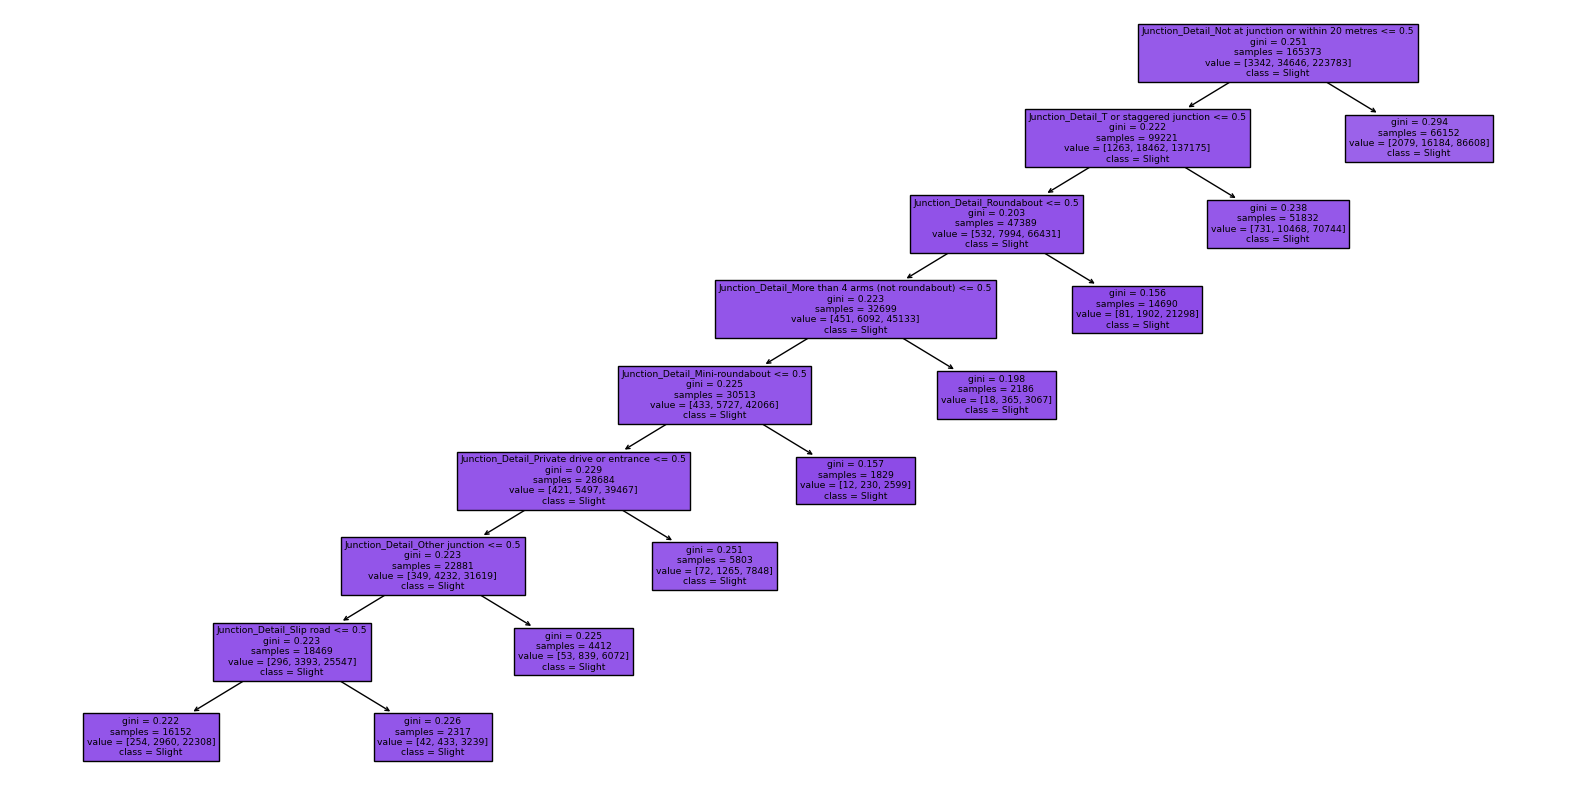

In [97]:
# Visualizar uma das árvores de decisão
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=[str(c) for c in rf.classes_], filled=True)
plt.show()